In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from utils.manifold_metrics import *


In [8]:
# load data
result_path = '../../figures-revision-1/manifold-SRD-long-formal--3-40/nsyb-G7f-r5HT1.0'
folder_name = 'cv_merge'
filename_train = 'data_merge_train.npy'
filename_test = 'data_merge_test.npy'
# statistics choice
statistics_choice = 'return_loc'
if_save = True
if if_save:
    figure_save_path = result_path +'/'+statistics_choice
    f = os.path.exists(figure_save_path)
    if not f:
        os.makedirs(figure_save_path)
# parameters
trial_seg_len = 3
num_trial = 180
num_dim = 2
time_range = range(0,43)
return_time_range = range(38,40)
# stim
stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])


In [9]:
# load data
data_merge_train = np.load(result_path+'/'+folder_name+'/'+filename_train)
data_merge_train = data_merge_train[:,:,time_range,:,:]
print(np.shape(data_merge_train))
data_merge_test = np.load(result_path+'/'+folder_name+'/'+filename_test)
data_merge_test = data_merge_test[:,:,time_range,:,:]
print(np.shape(data_merge_test))

(10, 3, 43, 180, 2)
(10, 3, 43, 180, 2)


In [10]:
# calculate return loc
num_fly = np.size(data_merge_train,0)
num_channel_choice = np.size(data_merge_train,1)
distance_inter_cluster_train = np.zeros((num_fly,num_channel_choice,4,num_dim,int(num_trial/trial_seg_len)))
distance_inter_cluster_test = np.zeros((num_fly,num_channel_choice,4,num_dim,int(num_trial/trial_seg_len)))
trial_flag = np.array(range(num_trial))
for ii in range(num_fly):
    for j in range(num_channel_choice):
        data_train = np.squeeze(data_merge_train[ii,j,:,:,:]) 
        data_test = np.squeeze(data_merge_test[ii,j,:,:,:]) 
        for pp in range(int(num_trial/trial_seg_len)):
            ind = np.array(trial_flag>=pp*trial_seg_len) * np.array(trial_flag<(pp+1)*trial_seg_len)
            if statistics_choice == 'return_loc':
                distance_inter_cluster_train[ii,j,:,:,pp] = compute_return_loc(data_train[:,ind,:],stim[ind],return_time_range)
                distance_inter_cluster_test[ii,j,:,:,pp] = compute_return_loc(data_test[:,ind,:],stim[ind],return_time_range)

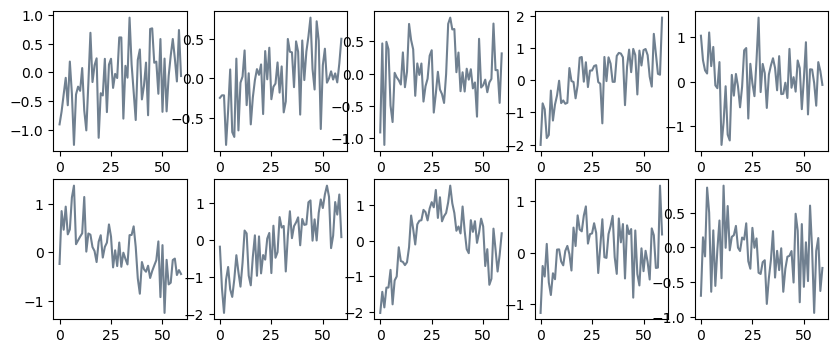

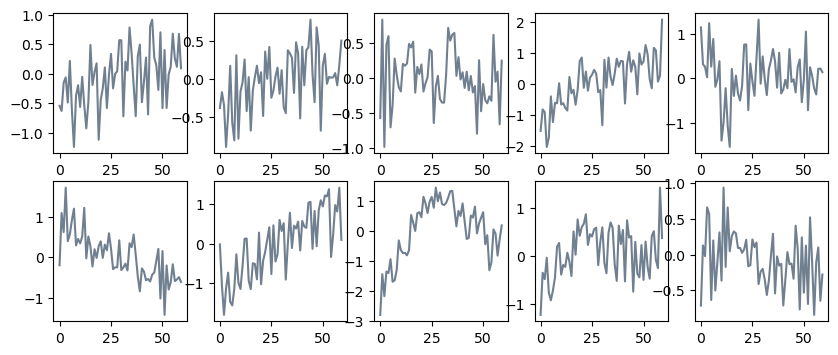

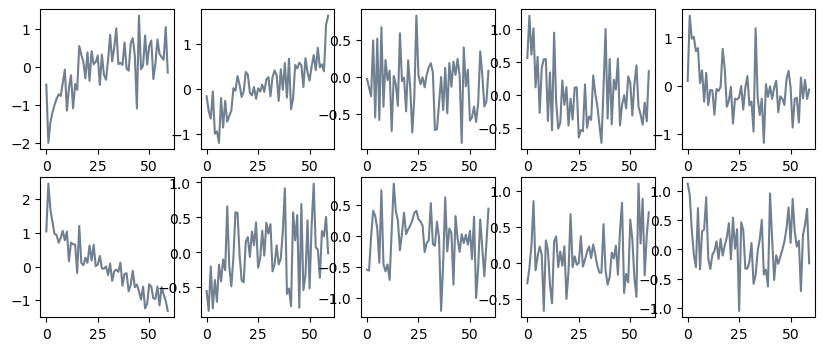

In [11]:
# plot
train_test = 1
odor_selected = 0
x_y = 0
for j in range(num_channel_choice):
    plt.figure(figsize = (10,4))
    for i in range(num_fly):
        plt.subplot(2,5,i+1)
        fly_selected = i
        channel_selected = j
        if train_test == 0:
            the_data = np.squeeze(distance_inter_cluster_train[fly_selected,channel_selected,odor_selected,:,:])
        else:
            the_data = np.squeeze(distance_inter_cluster_test[fly_selected,channel_selected,odor_selected,:,:])

        plt.plot(np.squeeze(the_data[x_y,:]),color = 'slategray')
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(figure_save_path + '/' + statistics_choice+'_'+'channel_'+str(channel_selected)+'_train_test_'+str(train_test)+'_odor_selected_'+str(odor_selected)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(figure_save_path + '/' + statistics_choice+'_'+'channel_'+str(channel_selected)+'_train_test_'+str(train_test)+'_odor_selected_'+str(odor_selected)+'.pdf',dpi = 300,bbox_inches = 'tight')
        np.save(figure_save_path + '/' + statistics_choice+'_train.npy',distance_inter_cluster_train)
        np.save(figure_save_path + '/' + statistics_choice+'_test.npy',distance_inter_cluster_test)
    plt.show()

(10, 3, 4, 2, 60)
(10, 3, 4, 2, 60)


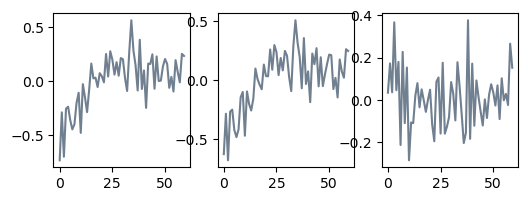

In [12]:
print(np.shape(distance_inter_cluster_train))
print(np.shape(distance_inter_cluster_test))
# average across flies
train_test = 0
odor_selected = 0
x_y = 0
if train_test == 0:
    the_distance = np.squeeze(distance_inter_cluster_train[:,:,odor_selected,x_y,:])
else:
    the_distance = np.squeeze(distance_inter_cluster_test[:,:,odor_selected,x_y,:])
plt.figure(figsize = (6,2))
for i in range(num_channel_choice):
    plt.subplot(1,3,i+1)
    the_mean = np.squeeze(the_distance[:,i,:])
    the_mean = np.mean(the_mean,0)
    plt.plot(the_mean,color = 'slategray')